In [76]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the wine dataset

import pandas as pd
data = pd.read_csv("wine.csv")
x = data
y = data.pop(data.columns[0])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print('Accuracy percentage :',round((accuracy*100),2),"%")
print("Classification Report:")
print(report)


Accuracy: 0.9814814814814815
Accuracy percentage : 98.15 %
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



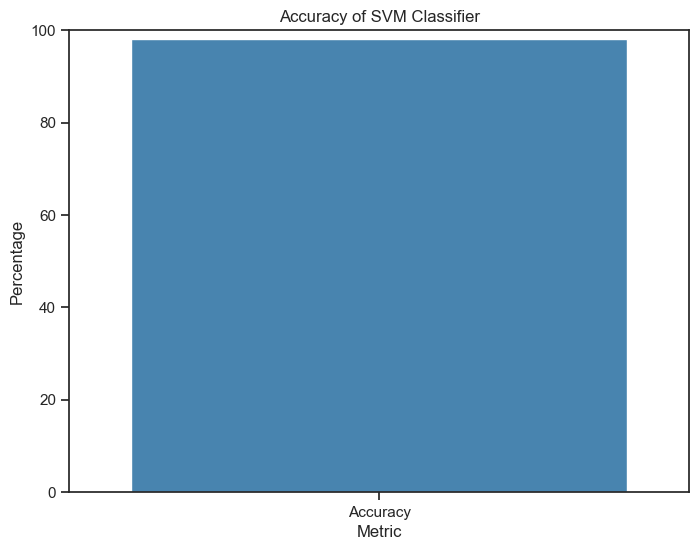

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and plot the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = round(accuracy * 100, 2)

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy_percentage], palette='Blues_d')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for accuracy percentage
plt.title('Accuracy of SVM Classifier')
plt.xlabel('Metric')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


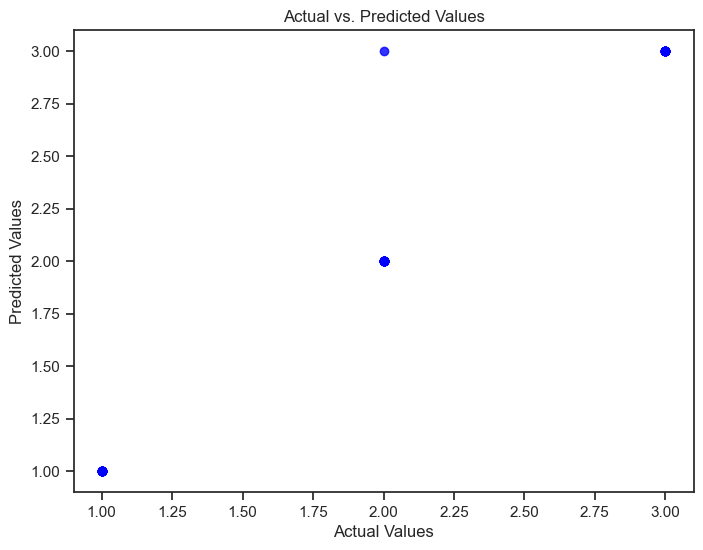

In [55]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', alpha=0.8)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


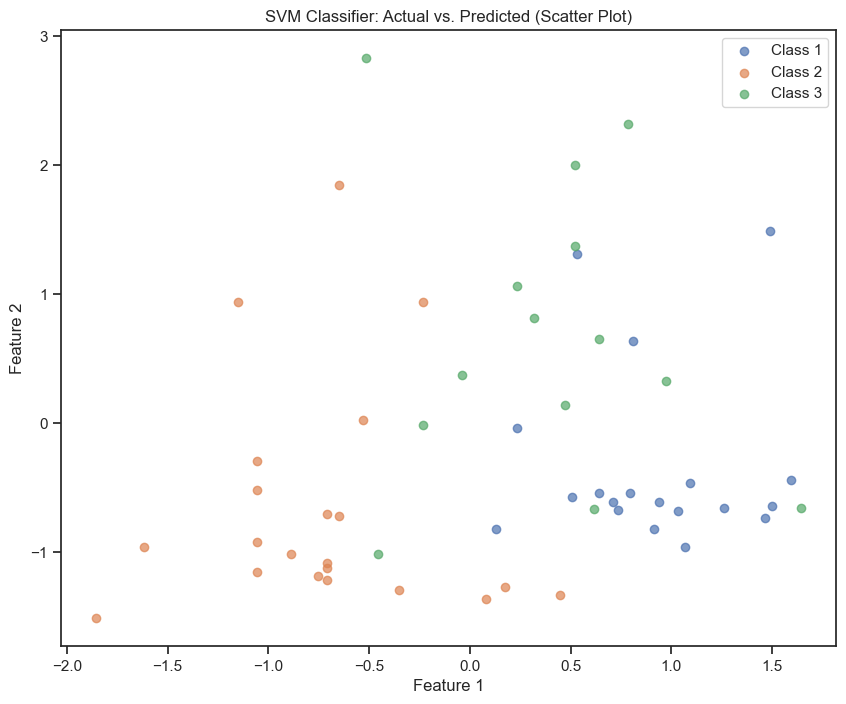

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot with different colors for each class
plt.figure(figsize=(10, 8))

# Define unique class labels
classes = np.unique(y_test)

# Iterate through each class and plot points with the corresponding color
for class_label in classes:
    indices = np.where(y_test == class_label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], label=f'Class {class_label}', alpha=0.7)

plt.title('SVM Classifier: Actual vs. Predicted (Scatter Plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
